<a href="https://colab.research.google.com/github/Dipika591/Basic_Python/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [43]:
# 1. Data Exploration and Loading
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [44]:
# Checking for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [45]:
# Summary statistics
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


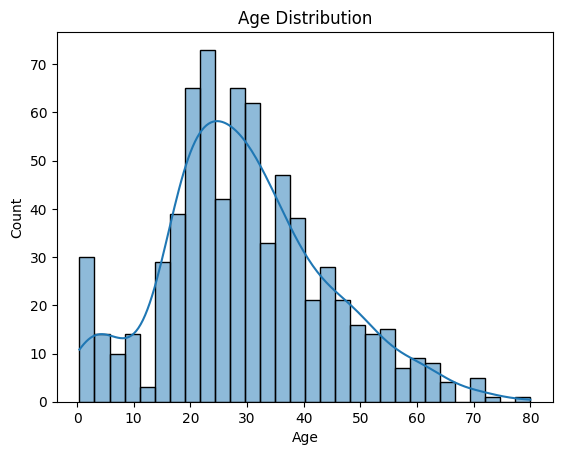

In [46]:
# Visualizations
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

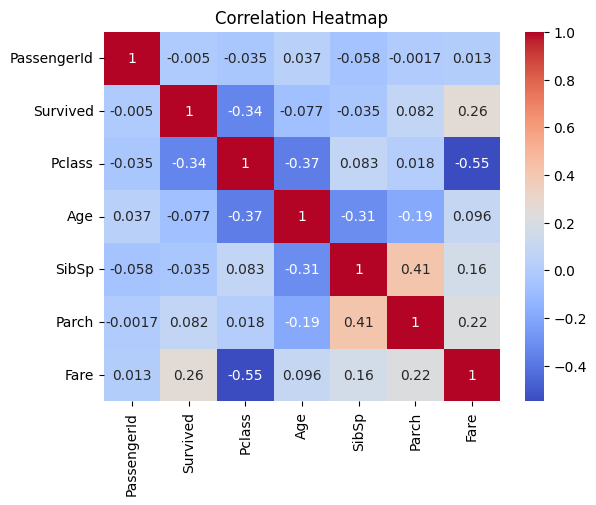

In [47]:
# Correlation heatmap
numeric_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# 2. Data Preprocessing
# Filling missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-48-92c2ad4cda94>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-48-92c2ad4cda94>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [49]:
# Encoding categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [50]:
# Dropping unnecessary columns
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [51]:
# Splitting data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [52]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# 3. Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
# 4. Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.11882414, 0.22020361, 0.15103291, 0.89544419, 0.71169661,
       0.927945  , 0.67613765, 0.08851487, 0.74472544, 0.91226122,
       0.31055324, 0.0750913 , 0.39555766, 0.13659382, 0.19087387,
       0.94471818, 0.31403772, 0.70280598, 0.27327795, 0.30405252,
       0.11492727, 0.40652996, 0.59757718, 0.14445087, 0.11300321,
       0.07762468, 0.42424897, 0.23586869, 0.071891  , 0.59579227,
       0.15670209, 0.63947482, 0.58379349, 0.60400475, 0.13133857,
       0.13142907, 0.42047635, 0.66821649, 0.94798721, 0.11848281,
       0.18519739, 0.08168023, 0.1221813 , 0.15461972, 0.56152888,
       0.07997916, 0.12262964, 0.12051433, 0.11173009, 0.3438069 ,
       0.71874562, 0.82915977, 0.03859977, 0.54265608, 0.04696666,
       0.93524016, 0.19386103, 0.92747871, 0.76276611, 0.7153393 ,
       0.12900857, 0.85834225, 0.76551518, 0.42683298, 0.1291871 ,
       0.6604403 , 0.28434198, 0.10440238, 0.1479783 , 0.87842112,
       0.74764016, 0.94669441, 0.60624332, 0.91340102, 0.13932

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC-AUC Score: 0.8768339768339768


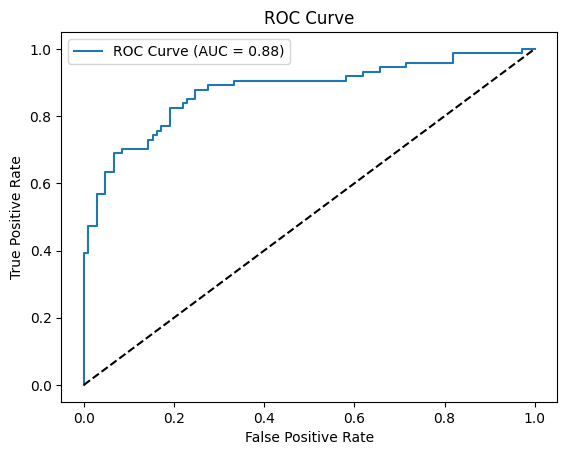

In [56]:
# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [57]:
# 5. Model Interpretation
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

Feature Coefficients:
PassengerId: 0.0003524369113756826
Pclass: -0.9330646197989694
Age: -0.030585168956030227
SibSp: -0.287707922529204
Parch: -0.11808495775535183
Fare: 0.0026182238743477685
Sex_male: -2.60759004243783
Embarked_Q: -0.10991980704175273
Embarked_S: -0.4003860317956515
